In [9]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

### from here, using 2016 update

https://doi.pangaea.de/10.1594/PANGAEA.777384

In [10]:
w = pd.read_csv('./data/diatomdatabase.csv')

In [11]:
w.columns

Index(['Primary key', 'Origin Database', 'Project ID', 'Cruise or station ID',
       'Year', 'Month', 'Day', 'Date', 'Longitude', 'Latitude', 'Depth',
       'Name entry', 'Corrected name entry', 'Genera', 'Species',
       'Other infos', 'Group', 'WoRMS', 'Abundance (cells L-1)',
       'min V (µm3 cell-1)', 'min A (µm2 cell-1)', 'min A/V (µm-1)',
       'min pg C cell -1', 'total min mg C m-3', 'max V (µm3 cell-1)',
       'max A (µm2 cell-1)', 'max A/V (µm-1)', 'max pg C cell -1',
       'total max mg C m-3', 'average V (µm3 cell-1)',
       'average A (µm2 cell-1)', 'average A/V (µm-1)',
       'average total mg C m-3', 'Gear used', 'Couting method', 'Reference',
       'Contact person', 'Preservative', 'Weblink'],
      dtype='object')

In [12]:
w_sel = w[['Year','Month','Longitude','Latitude','Depth','average total mg C m-3']]


w_sel.rename(columns={'average total mg C m-3': 'avgmgCm3'}, inplace=True)
w_sel['mmolCm3'] = w_sel['avgmgCm3']/12
w_sel = w_sel[w_sel['Latitude'] <= -50]
w_sel = w_sel[w_sel['Depth'] <= 50]

w_sel['season'] = 0

w_sel['season'][w_sel['Month'] == 1] = 1
w_sel['season'][w_sel['Month'] == 2] = 1
w_sel['season'][w_sel['Month'] == 12] = 1

w_sel['season'][w_sel['Month'] == 3] = 2
w_sel['season'][w_sel['Month'] == 4] = 2
w_sel['season'][w_sel['Month'] == 5] = 2

w_sel['season'][w_sel['Month'] == 6] = 3
w_sel['season'][w_sel['Month'] == 7] = 3
w_sel['season'][w_sel['Month'] == 8] = 3

w_sel['season'][w_sel['Month'] == 9] = 4
w_sel['season'][w_sel['Month'] == 10] = 4
w_sel['season'][w_sel['Month'] == 11] = 4
#.to_xarray()

In [13]:
w_sel

,Year,Month,Longitude,Latitude,Depth,avgmgCm3,mmolCm3,season
16114,1992,10,-6.06,-55.99,36.0,0.248,0.020667,4
16115,1992,10,-6.06,-55.99,19.0,0.213,0.017750,4
16124,1992,10,-6.06,-55.99,36.0,1.283,0.106917,4
16125,1992,10,-6.06,-55.99,36.0,26.667,2.222250,4
16126,1992,10,-6.06,-55.99,36.0,0.228,0.019000,4
...,...,...,...,...,...,...,...,...
88644,1985,2,-70.33,-68.00,50.0,0.010,0.000833,1
88645,1985,2,-70.33,-68.00,0.0,0.014,0.001167,1
88646,1985,2,-70.33,-68.00,50.0,0.038,0.003167,1
88647,1985,2,-70.33,-68.00,0.0,0.005,0.000417,1


month 1, median 0.066 mmol C/m3, mean 5.58
month 2, median 0.008 mmol C/m3, mean 1.499
month 3, median nan mmol C/m3, mean nan
month 4, median 0.077 mmol C/m3, mean 0.406
month 5, median 0.077 mmol C/m3, mean 0.298
month 6, median 0.052 mmol C/m3, mean 0.308
month 7, median nan mmol C/m3, mean nan
month 8, median nan mmol C/m3, mean nan
month 9, median nan mmol C/m3, mean nan
month 10, median 0.148 mmol C/m3, mean 6.259
month 11, median 0.025 mmol C/m3, mean 1.097
month 12, median 0.509 mmol C/m3, mean 13.038
season DJF, median 0.019 mmol C/m3, mean 3.293, n.obs = 1181
season MAM, median 0.077 mmol C/m3, mean 0.38, n.obs = 512
season JJA, median 0.052 mmol C/m3, mean 0.308, n.obs = 23
season SON, median 0.042 mmol C/m3, mean 2.406, n.obs = 284


Text(0, 0.5, 'mmol C m$^{-3}$')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


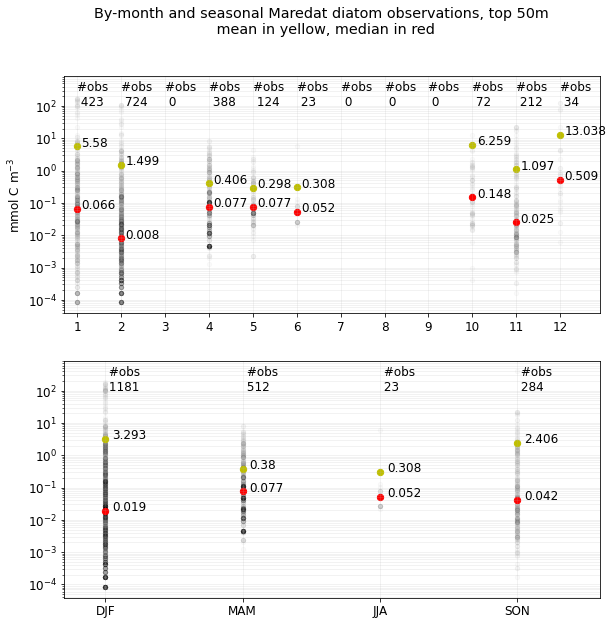

In [14]:
fact = 0.8
fig, axs = plt.subplots(2,1, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].scatter(w_sel.Month, w_sel.mmolCm3, s = 20, color = 'k', marker = 'o', alpha = 0.021)
for i in range(1,13):
    tval = (w_sel.mmolCm3[w_sel.Month == i]).to_numpy()
    nobs = len(tval[~np.isnan(tval)])
    tmed = np.around(np.nanmedian(tval), decimals = 3)
    tmean = np.around(np.nanmean(tval), decimals = 3)
    print(f'month {i}, median {tmed} mmol C/m3, mean {tmean}')
    axs[0].scatter(i, tmed,\
                   alpha = 1, color = 'r', marker = 'o', s = 40)
    axs[0].scatter(i, tmean,\
                   alpha = 1, color = 'y', marker = 'o', s = 40)
    axs[0].text(i+0.1, tmed, s = f'{tmed}')
    axs[0].text(i+0.1, tmean, s = f'{tmean}')
    axs[0].text(i,100, s= f'#obs \n {nobs}')
    
axs[0].set_yscale('log')
axs[0].set_xticks(np.arange(1,13,1))
axs[0].set_xlim([0.7,12.9])
axs[1].set_xlim([0.7,4.6])

axs[0].grid(True, which="both", ls="-", alpha = 0.2)


axs[1].scatter(w_sel.season, w_sel.mmolCm3, s = 20, marker = 'o', color = 'k', alpha = 0.021)
for i in range(1,5):
    tval = (w_sel.mmolCm3[w_sel.season == i]).to_numpy()
    nobs = len(tval[~np.isnan(tval)])
    tmed = np.around(np.nanmedian(tval), decimals = 3)
    tmean = np.around(np.nanmean(tval), decimals = 3)
    tseas = ['DJF','MAM','JJA','SON']
    print(f'season {tseas[i-1]}, median {tmed} mmol C/m3, mean {tmean}, n.obs = {nobs}')
    axs[1].scatter(i, tmed,\
                   alpha = 1, color = 'r', marker = 'o', s = 40)
    axs[1].scatter(i, tmean,\
                   alpha = 1, color = 'y', marker = 'o', s = 40)
    axs[1].text(i+0.051, tmed, s = f'{tmed}')
    axs[1].text(i+0.051, tmean, s = f'{tmean}')
    axs[1].text(i,100, s= f' #obs \n {nobs}')
    
axs[1].set_yscale('log')
axs[1].set_xticks(np.arange(1,5,1))
q = axs[1].set_xticklabels(['DJF','MAM','JJA','SON'])
axs[1].grid(True, which="both", ls="-", alpha = 0.2)

plt.suptitle('By-month and seasonal Maredat diatom observations, top 50m \n mean in yellow, median in red', y = 0.98)
axs[0].set_ylabel('mmol C m$^{-3}$')
# axs[1].scatter(w_sel.season, w_sel.mmolCm3, s = 20, marker = 'o', alpha = 0.051)
# axs[1].set_yscale('log')
# axs[1].set_xticks(np.arange(1,5,1))




season DJF, median 0.019 mmol C/m3, mean 3.293, n.obs = 1181
season MAM, median 0.077 mmol C/m3, mean 0.38, n.obs = 512
season JJA, median 0.052 mmol C/m3, mean 0.308, n.obs = 23
season SON, median 0.042 mmol C/m3, mean 2.406, n.obs = 284
1.5967500000000001


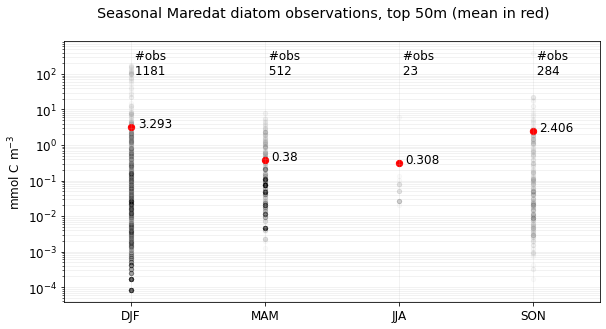

In [22]:
fact = 0.8
fig, axs = plt.subplots(1,1, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
#axs = axs.ravel()

axs.scatter(w_sel.season, w_sel.mmolCm3, s = 20, marker = 'o', color = 'k', alpha = 0.021)
for i in range(1,5):
    tval = (w_sel.mmolCm3[w_sel.season == i]).to_numpy()
    nobs = len(tval[~np.isnan(tval)])
    tmed = np.around(np.nanmedian(tval), decimals = 3)
    tmean = np.around(np.nanmean(tval), decimals = 3)
    tseas = ['DJF','MAM','JJA','SON']
    print(f'season {tseas[i-1]}, median {tmed} mmol C/m3, mean {tmean}, n.obs = {nobs}')
#     axs.scatter(i, tmed,\
#                    alpha = 1, color = 'r', marker = 'o', s = 40)
    axs.scatter(i, tmean,\
                   alpha = 1, color = 'r', marker = 'o', s = 40)
    #axs.text(i+0.051, tmed, s = f'{tmed}')
    axs.text(i+0.051, tmean, s = f'{tmean}')
    axs.text(i,100, s= f' #obs \n {nobs}')
    
axs.set_yscale('log')
axs.set_xticks(np.arange(1,5,1))
q = axs.set_xticklabels(['DJF','MAM','JJA','SON'])
axs.grid(True, which="both", ls="-", alpha = 0.2)
axs.set_xlim([0.5,4.5])
plt.suptitle('Seasonal Maredat diatom observations, top 50m (mean in red)', y = 0.98)
axs.set_ylabel('mmol C m$^{-3}$')
# axs[1].scatter(w_sel.season, w_sel.mmolCm3, s = 20, marker = 'o', alpha = 0.051)
# axs[1].set_yscale('log')
# axs[1].set_xticks(np.arange(1,5,1))



print((3.293+0.38+0.308+2.406)/4)

In [ ]:
# import matplotlib
# def scatter_southern(fig, ax1, lons, lats, tdat, tvmin, dotsize,
#                   tavmax, tticks, northex = -50, fs = 12, 
#                   tit = '', cbarlab = '', tcmap = 'viridis', lm = True, cbr = True):
   
#     ax1.set_extent([-180, 180, -80, northex], ccrs.PlateCarree())
#     #make that circle
#     theta = np.linspace(0, 2*np.pi, 100)
#     center, radius = [0.5, 0.5], 0.5
#     verts = np.vstack([np.sin(theta), np.cos(theta)]).T
#     circle = mpath.Path(verts * radius + center)
#     ax1.set_boundary(circle, transform=ax1.transAxes)
#     #lons = nav_lon[0:37,:]; lats = nav_lat[0:37,:]; 
#     mesh = ax1.scatter(lons, lats, s = dotsize, c = tdat, cmap = tcmap, alpha = 0.8,
#                        norm=matplotlib.colors.LogNorm(vmin=0.001, vmax=100),
#                      transform=ccrs.PlateCarree())
#     ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
#                                                  edgecolor='face', facecolor='k'))
#     ax1.set_title(tit, fontsize = fs)
    
#     cb = fig.colorbar(mesh, ax = ax1, orientation = 'horizontal',
#              pad = 0.06, fraction = 0.045, shrink = 0.9)
    
# #     cb = 0
# #     if cbr:
# #         cb = fig.colorbar(mesh, ax = ax1, orientation = 'horizontal',
# #                      pad = 0.06, fraction = 0.045, shrink = 0.9)
# #         cb.set_label(label=cbarlab,fontsize = fs)
# #         cb.set_ticks(tticks, fontsize = 105)
# #         cb.ax.tick_params(labelsize=16)
#     return cb



In [ ]:
fact = 0.7
tfig = plt.figure(figsize=[14.5*fact, 14.5*fact])

for i in range(1,5):
    ax1 = tfig.add_subplot(2, 2, i, projection=ccrs.Orthographic(0, -90))
    lons = (w_sel.Longitude[w_sel.season == i]).to_numpy()
    lats = (w_sel.Latitude[w_sel.season == i]).to_numpy()
    tdat = (w_sel.mmolCm3[w_sel.season == i]).to_numpy()
    nobs = len(tdat[~np.isnan(tdat)])
    
    tits = [f'DJF (# obs {nobs})',f'MAM (# obs {nobs})',f'JJA (# obs {nobs})',f'SON (# obs {nobs})']
    tticks = np.arange(0,1.25,0.25)
    dotsize = 30
    scatter_southern(fig, ax1, lons, lats, tdat, tvmin, dotsize,
                      tvmax, tticks, northex = -50, fs = 12, 
                      tit = f'{tits[i-1]}', \
                     cbarlab = 'mmol C m$^{-3}$', tcmap = 'Spectral', lm = True, cbr = True)
    
plt.suptitle('Maredat in-situ diatom observations (top 50m)')